In [46]:
import cv2
import numpy
from PIL import Image
from torchvision import transforms
#image = cv2.imread('C:\d drive\design credit\pytorch implementation of heat mapping\image dataset\imagenet-sample-images\n01496331_electric_ray.JPEG')
image = Image.open(r"C:\d drive\design credit\LRP_vgg19\castle3.jpg")
img_rsz = image.resize((224,224))
img = numpy.array(img_rsz)[...,::-1]/255.0

In [47]:
#input_image = Image.open(filename)
'''
preprocess = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model
'''

'\npreprocess = transforms.Compose([\n    transforms.Resize(224),\n    transforms.CenterCrop(224),\n    transforms.ToTensor(),\n    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),\n])\ninput_tensor = preprocess(image)\ninput_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model\n'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


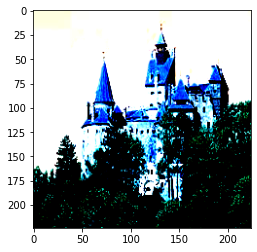

In [48]:
import torch
#X = (torch.FloatTensor(input_batch))
mean = torch.Tensor([0.485, 0.456, 0.406]).reshape(1,-1,1,1)
std  = torch.Tensor([0.229, 0.224, 0.225]).reshape(1,-1,1,1)
X = (torch.FloatTensor(img[numpy.newaxis].transpose([0,3,1,2])*1) - mean) / std
import matplotlib.pyplot as plt
import torchvision
plt.imshow(torchvision.utils.make_grid(X, nrow=1).permute(1, 2, 0))

In [49]:
print (X)

tensor([[[[ 1.6838,  1.6838,  1.6838,  ...,  1.6495,  1.6495,  1.6495],
          [ 1.6838,  1.6838,  1.6838,  ...,  1.6495,  1.6495,  1.6495],
          [ 1.6838,  1.6838,  1.6838,  ...,  1.6667,  1.6667,  1.6667],
          ...,
          [-1.3815, -1.9295, -2.0152,  ..., -2.1179, -1.9124, -1.8610],
          [-1.3302, -1.6384, -1.6898,  ..., -2.0837, -1.7069, -1.6898],
          [-0.9877, -1.0733, -1.1589,  ..., -2.0152, -1.4329, -1.3987]],

         [[ 1.2381,  1.2381,  1.2381,  ...,  1.2731,  1.2731,  1.2731],
          [ 1.2381,  1.2381,  1.2381,  ...,  1.2731,  1.2731,  1.2731],
          [ 1.2381,  1.2381,  1.2381,  ...,  1.2906,  1.2906,  1.2906],
          ...,
          [-0.4076, -0.9678, -1.0728,  ..., -1.0903, -0.8102, -0.7052],
          [-0.3550, -0.6877, -0.7402,  ..., -0.9853, -0.4951, -0.4776],
          [-0.0049, -0.1099, -0.2150,  ..., -0.8803, -0.1975, -0.1625]],

         [[ 0.8797,  0.8797,  0.8797,  ...,  0.9319,  0.9145,  0.9145],
          [ 0.8797,  0.8797,  

In [50]:
import torchvision
import utils
model = torchvision.models.vgg19(pretrained=True); model.eval()
layers = list(model._modules['features']) + utils.toconv(list(model._modules['classifier']))
L = len(layers)

In [51]:
print (model._modules['features'])

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

In [52]:
model._modules['classifier']

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)

In [53]:
len(layers)

44

In [54]:
A = [X]+[None]*L
for l in range(L): A[l+1] = layers[l].forward(A[l])


In [55]:
print(len(A[-1][0]))

1000


In [56]:
scores = numpy.array(A[-1].data.view(-1))
ind = numpy.argsort(-scores)
for i in ind[:10]:
    print('%20s (%3d): %6.3f'%(utils.imgclasses[i][:20],i,scores[i]))


              castle (483): 20.559
           monastery (663): 14.505
              palace (698): 14.150
 bell cote, bell cot (442): 11.001
 lakeside, lakeshore (975): 10.646
        valley, vale (979): 10.630
church, church build (497): 10.596
                 alp (970): 10.408
       jigsaw puzzle (611): 10.388
       space shuttle (812):  9.718


In [57]:
T = torch.FloatTensor((1.0*(numpy.arange(1000)==ind[0]).reshape([1,1000,1,1])))

R = [None]*L + [(A[-1]*T).data]

In [58]:
for l in range(1,L)[::-1]:
    
    A[l] = (A[l].data).requires_grad_(True)

    if isinstance(layers[l],torch.nn.MaxPool2d): layers[l] = torch.nn.AvgPool2d(2)

    if isinstance(layers[l],torch.nn.Conv2d) or isinstance(layers[l],torch.nn.AvgPool2d):

        if l <= 16:       rho = lambda p: p + 0.25*p.clamp(min=0); incr = lambda z: z+1e-9
        if 17 <= l <= 36: rho = lambda p: p;                       incr = lambda z: z+1e-9+0.25*((z**2).mean()**.5).data
        if l >= 37:       rho = lambda p: p;                       incr = lambda z: z+1e-9

        # Transform weights of layer and execute forward pass
        z = incr(utils.newlayer(layers[l],rho).forward(A[l]))  # step 1
        s = (R[l+1]/z).data                                    # step 2
        (z*s).sum().backward(); c = A[l].grad                  # step 3
        R[l] = (A[l]*c).data                                   # step 4

    else:

        R[l] = R[l+1]

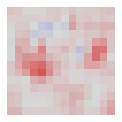

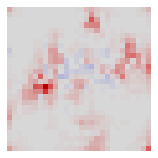

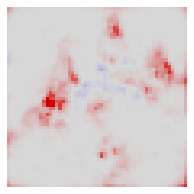

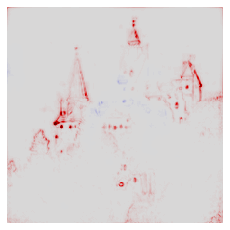

In [59]:
for i,l in enumerate([31,21,11,1]):
    utils.heatmap(numpy.array(R[l][0]).sum(axis=0),0.5*i+1.5,0.5*i+1.5)

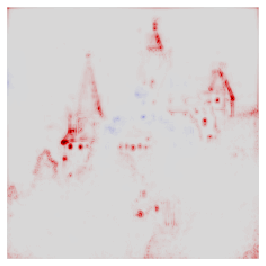

In [60]:

A[0] = (A[0].data).requires_grad_(True)

lb = (A[0].data*0+(0-mean)/std).requires_grad_(True)
hb = (A[0].data*0+(1-mean)/std).requires_grad_(True)

z = layers[0].forward(A[0]) + 1e-9                                     # step 1 (a)
z -= utils.newlayer(layers[0],lambda p: p.clamp(min=0)).forward(lb)    # step 1 (b)
z -= utils.newlayer(layers[0],lambda p: p.clamp(max=0)).forward(hb)    # step 1 (c)
s = (R[1]/z).data                                                      # step 2
(z*s).sum().backward(); c,cp,cm = A[0].grad,lb.grad,hb.grad            # step 3
R[0] = (A[0]*c+lb*cp+hb*cm).data
utils.heatmap(numpy.array(R[0][0]).sum(axis=0),3.5,3.5)